# Regression Model to Predict House Prices

## Step 1: Load and Explore the Data

In [31]:
import pandas as pd

df = pd.read_csv("house_prices.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [32]:
df.isnull().sum()
df.dropna(inplace=True)

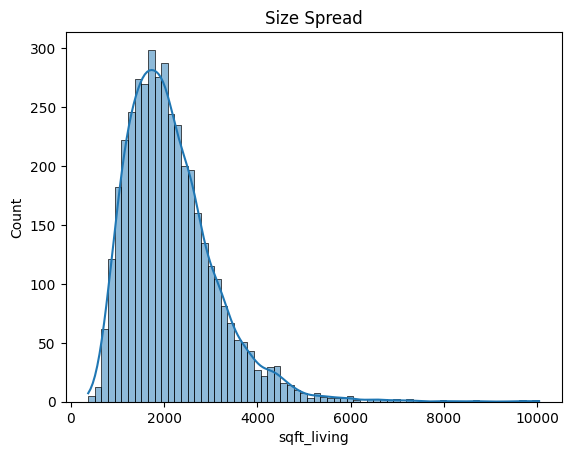

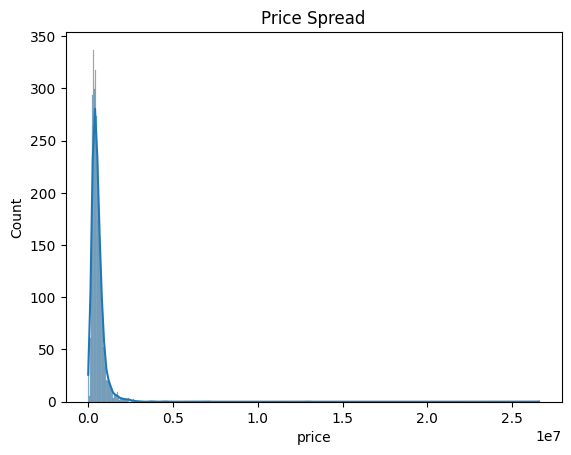

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['sqft_living'], kde=True)
plt.title("Size Spread")
plt.show()

sns.histplot(df['price'], kde=True)
plt.title("Price Spread")
plt.show()

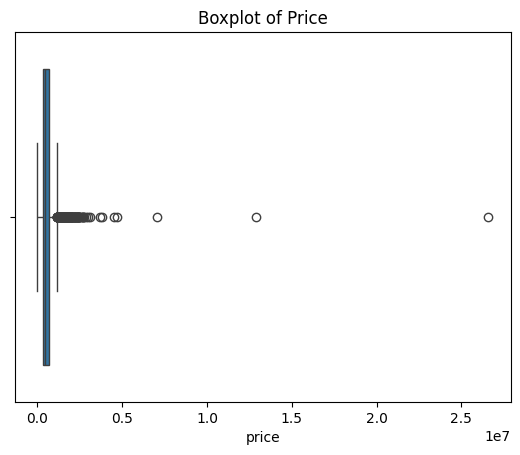

In [34]:
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price")
plt.show()

## Step 2: Preprocessing

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['sqft_living', 'bedrooms']] = scaler.fit_transform(df[['sqft_living', 'bedrooms']])

In [36]:
df = pd.get_dummies(df, columns=['city'], drop_first=True)

## Step 3: Feature Selection

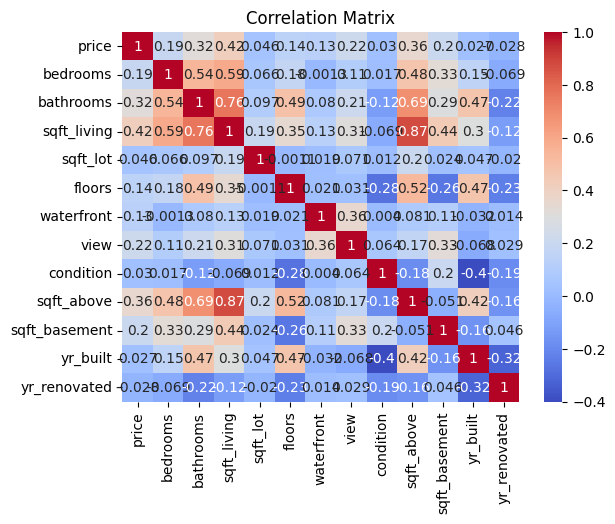

In [37]:
correlation = df.select_dtypes(include='number').corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Step 4: Model Training

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train = X_train.copy()
for col in X_train.select_dtypes(include='object'):
    try:
        X_train[col] = pd.to_datetime(X_train[col])
        X_train[col] = X_train[col].astype('int64')
    except:
        X_train.drop(columns=col, inplace=True)
X_train = X_train.select_dtypes(include='number')
model.fit(X_train, y_train)


C:\Users\Aryan Singh\AppData\Local\Temp\ipykernel_36156\3716318369.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train[col] = pd.to_datetime(X_train[col])
C:\Users\Aryan Singh\AppData\Local\Temp\ipykernel_36156\3716318369.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train[col] = pd.to_datetime(X_train[col])


LinearRegression()

## Step 5: Model Evaluation

In [40]:
X_test_encoded = pd.get_dummies(X_test)
X_test_encoded = X_test_encoded.reindex(columns=X_train.columns, fill_value=0)
y_pred = model.predict(X_test_encoded)


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(rmse)
print(r2)

13582884.658257948
-1758.8509315134704


In [42]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)

,Actual,Predicted
3487,600000.0,-1.289690e+07
1964,370000.0,-1.321870e+07
1582,471000.0,-1.309807e+07
296,240000.0,-1.321462e+07
149,413000.0,-1.328600e+07
1749,483300.0,-1.331789e+07
1610,585000.0,-1.306592e+07
1644,250000.0,-1.299757e+07
1814,522000.0,-1.318306e+07
3708,232500.0,-1.312290e+07
